# Assignment 11

1. Describe Canon's Matrix Multiplication algorithm.
2. Implement Canon's Matrix Multiplication using collective communication.
3. Analyze the efficiency of the code.

* Canon's Matrix Multiplication is an algorithm for multiplying matrices it helps with to distribute the computation across multiple processors in a parallel or distributed computing environment it is useful when dealing with very large matrices that cannot be efficiently handled by a single processor.

* Canon's algorithm works as follows
1. Divide each matrix into submatrices.
2. Distribute these submatrices across the processors in a grid-like fashion.
3. Each processor computes the partial products of its assigned submatrices iteratively shift the submatrices horizontally and vertically, so that each processor multiplies its submatrices with the corresponding ones from neighboring processors.
4. Repeat the shifting and multiplication steps until each processor has performed all necessary multiplications.
5. Accumulate the partial results to obtain the final product matrix.

In [8]:
from mpi4py import MPI
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

N = 2000  
if N % size != 0:
    raise ValueError("Matrix size N must be divisible by the number of processes (size)")

block_size = N // size  

print(f"Rank {rank}: Starting execution")

if rank == 0:
    print(f"Rank {rank}: Generating matrices A and B")
    A = np.random.randint(0, 10, (N, N))
    B = np.random.randint(0, 10, (N, N))
    print(f"Rank {rank}: Matrices A and B generated")
else:
    A = None
    B = None

print(f"Rank {rank}: Broadcasting matrices A and B")
start_time = time.time()
A = comm.bcast(A, root=0)
B = comm.bcast(B, root=0)
end_time = time.time()
print(f"Rank {rank}: Matrices A and B broadcasted")

A_rows = np.zeros((block_size, N), dtype=int)
comm.Scatter(A, A_rows, root=0)

start_time_multiplication = time.time()
C_rows = np.dot(A_rows, B)
end_time_multiplication = time.time()

C = None
if rank == 0:
    C = np.zeros((N, N), dtype=int)

comm.Gather(C_rows, C, root=0)

if rank == 0:
    print("Resultant Matrix C:")
    print(C)
    print("Broadcasting time:", end_time - start_time, "seconds")
    print("Matrix multiplication time:", end_time_multiplication - start_time_multiplication, "seconds")

Rank 0: Starting execution
Rank 0: Generating matrices A and B
Rank 0: Matrices A and B generated
Rank 0: Broadcasting matrices A and B
Rank 0: Matrices A and B broadcasted
Resultant Matrix C:
[[39301 38115 39276 ... 39972 40525 40039]
 [40443 39184 39780 ... 40613 40866 40722]
 [40396 39733 39094 ... 41001 40674 40047]
 ...
 [40679 39558 40017 ... 40813 41857 40597]
 [41755 38983 39306 ... 40994 41444 40810]
 [39028 37840 38002 ... 39761 40392 39509]]
Broadcasting time: 0.0170133113861084 seconds
Matrix multiplication time: 36.74707531929016 seconds


In [3]:
!mpiexec -n 4 python MPI_Scatter_Gather.py

Rank 3: Starting execution
Rank 3: Broadcasting matrices A and B
Rank 3: Matrices A and B broadcasted
Rank 1: Starting execution
Rank 1: Broadcasting matrices A and B
Rank 1: Matrices A and B broadcasted
Rank 2: Starting execution
Rank 2: Broadcasting matrices A and B
Rank 2: Matrices A and B broadcasted
Rank 0: Starting execution
Rank 0: Generating matrices A and B
Rank 0: Matrices A and B generated
Rank 0: Broadcasting matrices A and B
Rank 0: Matrices A and B broadcasted
Resultant Matrix C:
[[40890 41533 40346 ... 41776 41360 40546]
 [39549 39305 39292 ... 40792 39918 38704]
 [39597 39197 39112 ... 40250 39542 39111]
 ...
 [40889 40694 39536 ... 41066 40201 39835]
 [41301 40419 39929 ... 41947 41219 40105]
 [39774 39226 39003 ... 40789 39911 38739]]
Broadcasting time: 0.04213356971740723 seconds
Matrix multiplication time: 12.16959547996521 seconds


In [4]:
!mpiexec -n 8 python MPI_Scatter_Gather.py

Rank 3: Starting execution
Rank 3: Broadcasting matrices A and B
Rank 3: Matrices A and B broadcasted
Rank 5: Starting execution
Rank 5: Broadcasting matrices A and B
Rank 5: Matrices A and B broadcasted
Rank 1: Starting execution
Rank 1: Broadcasting matrices A and B
Rank 1: Matrices A and B broadcasted
Rank 2: Starting execution
Rank 2: Broadcasting matrices A and B
Rank 2: Matrices A and B broadcasted
Rank 7: Starting execution
Rank 7: Broadcasting matrices A and B
Rank 7: Matrices A and B broadcasted
Rank 6: Starting execution
Rank 6: Broadcasting matrices A and B
Rank 6: Matrices A and B broadcasted
Rank 4: Starting execution
Rank 4: Broadcasting matrices A and B
Rank 4: Matrices A and B broadcasted
Rank 0: Starting execution
Rank 0: Generating matrices A and B
Rank 0: Matrices A and B generated
Rank 0: Broadcasting matrices A and B
Rank 0: Matrices A and B broadcasted
Resultant Matrix C:
[[39367 40313 39846 ... 39423 39870 39227]
 [39930 40975 39596 ... 39867 40595 39561]
 [38730

In [5]:
from mpi4py import MPI
import numpy as np
import time

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

N = 2000  
if N % size != 0:
    raise ValueError("Matrix size N must be divisible by the number of processes (size)")

block_size = N // size  

print(f"Rank {rank}: Starting execution")

if rank == 0:
    print(f"Rank {rank}: Generating matrices A and B")
    A = np.random.randint(0, 10, (N, N))
    B = np.random.randint(0, 10, (N, N))
    print(f"Rank {rank}: Matrices A and B generated")
else:
    A = None
    B = None

print(f"Rank {rank}: Broadcasting matrices A and B")
start_time = time.time()
A = comm.bcast(A, root=0)
B = comm.bcast(B, root=0)
end_time = time.time()
print(f"Rank {rank}: Matrices A and B broadcasted")

A_rows = np.zeros((block_size, N), dtype=int)
comm.Scatter(A, A_rows, root=0)

start_time_multiplication = time.time()
C_rows = np.dot(A_rows, B)
end_time_multiplication = time.time()

start_time_gather = time.time()
C_all = np.zeros((N, N), dtype=int)
comm.Allgather(C_rows, C_all)
end_time_gather = time.time()

if rank == 0:
    print("Resultant Matrix C:")
    print(C_all)
    print("Broadcasting time:", end_time - start_time, "seconds")
    print("Gathering time:", end_time_gather - start_time_gather, "seconds")
    print("Matrix multiplication time:", end_time_multiplication - start_time_multiplication, "seconds")

Rank 0: Starting execution
Rank 0: Generating matrices A and B
Rank 0: Matrices A and B generated
Rank 0: Broadcasting matrices A and B
Rank 0: Matrices A and B broadcasted
Resultant Matrix C:
[[39286 40520 41025 ... 39506 40080 40731]
 [39804 40085 41133 ... 40010 40795 41125]
 [39301 40436 39992 ... 39477 39718 39905]
 ...
 [39685 42441 41165 ... 40145 41046 41222]
 [39311 40625 41750 ... 40231 40082 40267]
 [40596 41792 41829 ... 40820 41994 41560]]
Broadcasting time: 0.016011714935302734 seconds
Gathering time: 0.002999544143676758 seconds
Matrix multiplication time: 37.09537482261658 seconds


In [6]:
!mpiexec -n 4 python MPI_Allgather.py

Rank 3: Starting execution
Rank 3: Broadcasting matrices A and B
Rank 3: Matrices A and B broadcasted
Rank 0: Starting execution
Rank 0: Generating matrices A and B
Rank 0: Matrices A and B generated
Rank 0: Broadcasting matrices A and B
Rank 0: Matrices A and B broadcasted
Resultant Matrix C:
[[40390 41613 42308 ... 39966 40617 40247]
 [39805 39909 41212 ... 40205 40558 41291]
 [41095 40848 41587 ... 39871 40262 40793]
 ...
 [41147 41114 41982 ... 40127 40672 40632]
 [40029 39824 40773 ... 40097 39583 40377]
 [39479 40690 40869 ... 39596 40096 39963]]
Broadcasting time: 0.037689924240112305 seconds
Gathering time: 0.06966972351074219 seconds
Matrix multiplication time: 12.694447040557861 seconds
Rank 2: Starting execution
Rank 2: Broadcasting matrices A and B
Rank 2: Matrices A and B broadcasted
Rank 1: Starting execution
Rank 1: Broadcasting matrices A and B
Rank 1: Matrices A and B broadcasted


In [7]:
!mpiexec -n 8 python MPI_Allgather.py

Rank 5: Starting execution
Rank 5: Broadcasting matrices A and B
Rank 5: Matrices A and B broadcasted
Rank 6: Starting execution
Rank 6: Broadcasting matrices A and B
Rank 6: Matrices A and B broadcasted
Rank 1: Starting execution
Rank 1: Broadcasting matrices A and B
Rank 1: Matrices A and B broadcasted
Rank 2: Starting execution
Rank 2: Broadcasting matrices A and B
Rank 2: Matrices A and B broadcasted
Rank 7: Starting execution
Rank 7: Broadcasting matrices A and B
Rank 7: Matrices A and B broadcasted
Rank 0: Starting execution
Rank 0: Generating matrices A and B
Rank 0: Matrices A and B generated
Rank 0: Broadcasting matrices A and B
Rank 0: Matrices A and B broadcasted
Resultant Matrix C:
[[39256 40549 38907 ... 40831 40266 40966]
 [40495 39807 40080 ... 41006 40655 41473]
 [39952 40595 39476 ... 40758 39646 40756]
 ...
 [39402 39458 39381 ... 39838 40326 40670]
 [39833 39651 39985 ... 40758 40584 41711]
 [40211 39729 39469 ... 40826 40539 40597]]
Broadcasting time: 0.072250604629

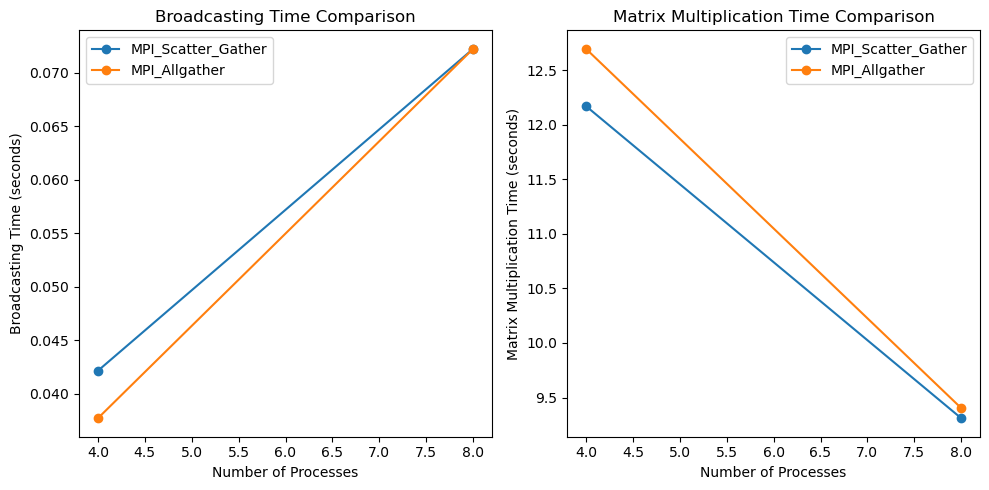

In [11]:
scatter_gather_processes = [4, 8]
scatter_gather_broadcasting_time = [0.04213356971740723, 0.0722498893737793]
scatter_gather_multiplication_time = [12.16959547996521, 9.310021162033081]

allgather_processes = [4, 8]
allgather_broadcasting_time = [0.037689924240112305, 0.0722506046295166 ]
allgather_multiplication_time = [12.694447040557861, 9.402881145477295]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(scatter_gather_processes, scatter_gather_broadcasting_time, marker='o', label='MPI_Scatter_Gather')
plt.plot(allgather_processes, allgather_broadcasting_time, marker='o', label='MPI_Allgather')
plt.xlabel('Number of Processes')
plt.ylabel('Broadcasting Time (seconds)')
plt.title('Broadcasting Time Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(scatter_gather_processes, scatter_gather_multiplication_time, marker='o', label='MPI_Scatter_Gather')
plt.plot(allgather_processes, allgather_multiplication_time, marker='o', label='MPI_Allgather')
plt.xlabel('Number of Processes')
plt.ylabel('Matrix Multiplication Time (seconds)')
plt.title('Matrix Multiplication Time Comparison')
plt.legend()

plt.tight_layout()
plt.show()

1. MPI_Scatter_Gather:

* With 4 processes, the broadcasting time is lower compared to MPI_Allgather, but the matrix multiplication time is higher.
* With 8 processes, the broadcasting time increases slightly, but the matrix multiplication time decreases significantly compared to 4 processes.

2. MPI_Allgather:

* With 4 processes, the broadcasting time is slightly higher compared to MPI_Scatter_Gather, but the gathering time is introduced. However, the matrix multiplication time is comparable to MPI_Scatter_Gather.
* With 8 processes, the broadcasting time is slightly higher compared to MPI_Scatter_Gather, and the gathering time becomes noticeable. However, the matrix multiplication time is the lowest among all configurations, indicating better parallel efficiency.

3. Conclusion:
* MPI_Scatter_Gather might be more efficient for smaller-scale parallelization, where the gathering is not significant compared to the reduction in matrix multiplication time.
* MPI_Allgather becomes more efficient as the number of processes increases, especially for larger-scale parallelization, due to its better load balancing and reduced communication-to-computation ratio.